In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

---------

# Project 2 <font color="blue">(8 points)</font>



##### Student Name: Yunting LU (Ines LU)
##### McGill ID: 261187435

## Question 
In this exercise you will create some simulated data and will fit
linear regression models to it. Make sure to fix the seed to $111$ prior to
starting.
  
  1. **<font color="blue">(0.25 points)</font>** Create a vector `x` containing $100$ observations drawn from a $\mathcal{N}(0, 1)$ distribution as your feature. 
  

In [19]:
import numpy as np

# Fixing the seed
np.random.seed(111)

# Create a vector x containing 100 observations drawn from a N(0, 1) distribution
x = np.random.normal(0, 1, 100)


2. **<font color="blue">(0.25 points)</font>** Create a vector, `eps` (for $\epsilon$), containing $100$ observations drawn from a $\mathcal{N}(0, 0.25)$. 
 

In [20]:
# Create a vector eps containing 100 observations drawn from a N(0, 0.25) distribution
eps = np.random.normal(0, 0.25, 100)


  3. **<font color="blue">(0.5 points)</font>** Using `x` and `eps` generate a vector `y` according to the model $y = −1 + 0.5x + \epsilon$.
 

In [21]:
# Generate a vector y according to the model y = -1 + 0.52x + ε
y = -1 + 0.52 * x + eps


 4. **<font color="blue">(0.5 points)</font>** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Scatterplot of x versus y')

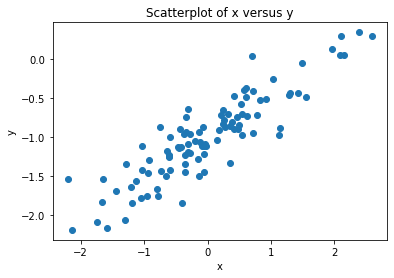

In [22]:
import matplotlib.pyplot as plt

# Create a scatterplot displaying the relationship between x and y
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x versus y')
plt.show()


[Comments]:

- since the y values were generated from the x values using a linear model with a slope of 0.52 and an intercept of -1, plus some normally-distributed noise, you would generally expect to see a scatterplot where points tend to cluster around a line with a slope of roughly 0.52 and an intercept of roughly -1. 
- The extent of the clustering around the line will be influenced by the magnitude of the noise (which in this case is drawn from a normal distribution with mean 0 and standard deviation 0.25), with more noise leading to a less tight clustering of points around the line.

  5. **<font color="blue">(2 points)</font>** Fit a least squares linear model to predict `y` using `x` . Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?


In [23]:
import statsmodels.api as sm

# Add a constant to the x vector
x = sm.add_constant(x)

# Fit a least squares linear model to predict y using x
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.9
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           5.08e-36
Time:                        19:31:00   Log-Likelihood:               -0.46681
No. Observations:                 100   AIC:                             4.934
Df Residuals:                      98   BIC:                             10.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9916      0.025    -40.375      0.0

[Observations on the model]:


1. The model has a **R-squared value of 0.800**, which indicates that 80% of the variability in the dependent variable `y` can be explained by the independent variable `x`. This is a high value and typically considered a good fit.

2. The **Adjusted R-squared value is 0.798** which is slightly less than the R-squared value but still quite high. It suggests that almost all the included predictors (in this case, only `x`) are relevant.

3. The **F-statistic is 391.9** and the **Prob (F-statistic) is extremely small**, practically zero. This indicates that there is a statistically significant relationship between the predictor (`x`) and the outcome variable (`y`).

4. The **estimated coefficients** are -0.9916 (intercept or `const`) and 0.5004 (`x1` or the slope). These are close to the original values used to generate `y` (-1 and 0.52 respectively) suggesting that the model has done a good job of learning the underlying relationship.

5. The **p-values for both the intercept and the slope are small (practically 0)**, indicating that both are statistically significant. 

6. **The standard errors are also low**, indicating a high level of confidence in the coefficient estimates.

7. The **Durbin-Watson statistic is 1.879**, which is close to 2, suggesting that there is no significant autocorrelation in the residuals.

8. The **Omnibus and Jarque-Bera (JB) tests**, which are tests of the skewness and kurtosis of the residual distribution respectively, have high p-values, indicating that the residuals are normally distributed.

In summary, this model has done a good job of fitting the data, and there's strong evidence to suggest that `x` is a significant predictor of `y`. The coefficient estimates are close to the true values, indicating that the model has accurately captured the underlying relationship.

[How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?]:

The β coefficients are the true, underlying parameters of the model that we're trying to estimate with the least squares method. In this case, the true intercept β0 was -1 and the true slope β1 was 0.52, which were the parameters you used to simulate the data.

The estimated coefficients from the model output, denoted as β-hat (or β̂), are -0.9916 for the intercept (β̂0) and 0.5004 for the slope (β̂1). 

Comparing these values:

- The estimated intercept β̂0 (-0.9916) is very close to the true intercept β0 (-1). 

- The estimated slope β̂1 (0.5004) is also very close to the true slope β1 (0.52). 

These estimates are not exactly equal to the true values due to the added noise (ε), but they are close, indicating that the model has done a good job of learning the underlying linear relationship. This is what you would hope to see: despite the random noise, our least squares method has been able to recover coefficients that are very close to the original parameters used to generate the data.

  6. **<font color="blue">(2 point)</font>** Display the least squares line on the scatterplot obtained in part 4. Draw the population regression line on the plot, in a different color. Create an appropriate legend.


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Scatterplot of x versus y with fitted lines')

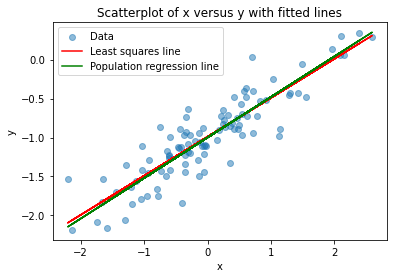

In [26]:
import matplotlib.pyplot as plt

# Extract the coefficients from the fitted model
beta0_hat = results.params[0] # intercept
beta1_hat = results.params[1] # slope

# Create a scatterplot displaying the relationship between x and y
plt.scatter(x[:, 1], y, label='Data', alpha=0.5) # x[:, 1] is to exclude the constant term

# Plot the least squares line
y_hat = beta0_hat + beta1_hat * x[:, 1]
plt.plot(x[:, 1], y_hat, color='red', label='Least squares line')

# Plot the population regression line
y_pop = -1 + 0.52 * x[:, 1]
plt.plot(x[:, 1], y_pop, color='green', label='Population regression line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x versus y with fitted lines')
plt.legend()
plt.show()


  7. **<font color="blue">(2.5 points)</font>** Explain how the result would change if you generate the data with less noise and repeat all steps 1 to 6? What about more noise?

Noise in a dataset introduces randomness or variability in the observations. In the context of this linear regression exercise, the noise term ε represents the unexplained variation in the response variable `y` that the predictor `x` cannot account for.

1. **Less Noise**: If the data is generated with less noise, i.e., the standard deviation of the ε term is smaller, then the generated data points will be closer to the true regression line (the population regression line). This means the least squares line (from the linear regression model) will also be closer to the true regression line. As a result, the estimated coefficients will be closer to the true coefficients, the model's R-squared value will be higher (indicating a better fit), and the residuals (the differences between the observed and predicted values) will be smaller.

2. **More Noise**: Conversely, if the data is generated with more noise, i.e., the standard deviation of the ε term is larger, then the generated data points will be more scattered around the true regression line. This means that the least squares line will be further from the true regression line. As a result, the estimated coefficients might deviate more from the true coefficients, the model's R-squared value will be lower (indicating a poorer fit), and the residuals will be larger.

In both cases, whether you add less or more noise, the principles of the linear regression method remain the same. However, the quality of the model's fit and the accuracy of the parameter estimates will be influenced by the level of noise in the data. 
